STUDI KASUS REGRESI LINIEAR SEDERHANA

In [1]:
#memanggil
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/anggreyni_mahasiswa/Praktikum_ml/Praktikum03/"

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv(path+"Data/socr.csv")
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [5]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [6]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Pra Pemroses Data, Konversi data menjadi satuan cm(tinggi) dan kg(berat)

In [7]:
df1 = (
    df[["Height(Inches)","Weight(Pounds)"]]
    .rename(columns={"Height(Inches)":"Tinggi_cm",
                     "Weight(Pounds)":"Berat_kg"})
    .assign(Tinggi_cm=lambda x: x["Tinggi_cm"]*2.54,
            Berat_kg=lambda x: x["Berat_kg"]/0.45359237
            )
    .round({"Tinggi_cm": 2, "Berat_kg": 2 })

).copy()
df1.head()


,Tinggi_cm,Berat_kg
0,167.09,249.11
1,181.65,300.90
2,176.27,337.37
3,173.27,313.80
4,172.18,318.12


5) Pembagian Data, 80% data training dan 20% data testing

In [11]:
from sklearn.model_selection import train_test_split

X = df1[["Tinggi_cm"]]
y = df1["Berat_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

6.Pemodelan : Training dan Testing data

In [14]:
from sklearn.linear_model import LinearRegression

## Buat objek instan dari class (linierRegresssion bernama model)
model = LinearRegression()

## jalankan Training
model.fit(X_train, y_train)

## jalankan Testing
##y_pred = model.predict(X_test)

LinearRegression()

7. Evaluasi Model

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (test):", r2)
print("MAE (kg):", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)  # default squared=True
rmse = np.sqrt(mse)
print("RMSE (kg):", rmse)

Koefisien (kg per cm): 2.68207530907577
Intersep (kg): -183.02971859977134
R2 (test): 0.249891148453949
MAE (kg): 17.83982892140383
RMSE (kg): 22.401718241842136


8. Persamaan Regresi

In [16]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + ({intercept:.3f})")

Persamaan: y = 2.682 * x + (-183.030)


9. Plot Regresi

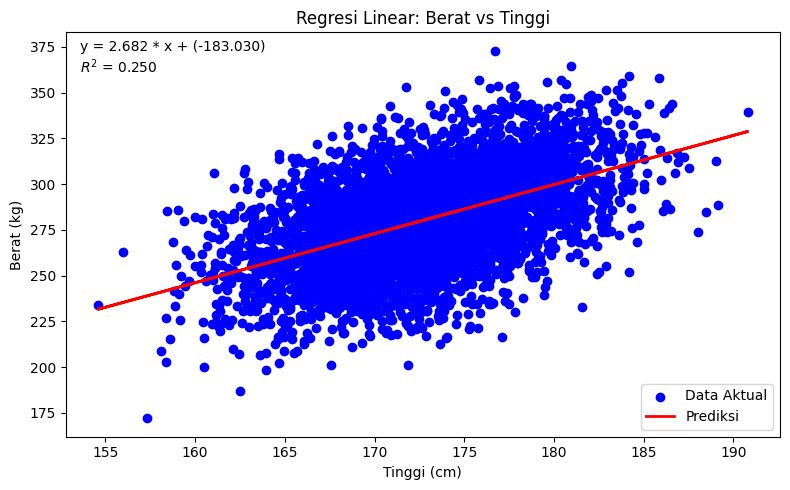

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + ({intercept:.3f})\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["Tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1)

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,243.81,285.609300,41.799300,0.828558
1,171.31,244.62,276.436603,31.816603,0.869935
2,169.29,282.97,271.018810,-11.951190,0.957765
3,163.30,286.35,254.953179,-31.396821,0.890355
4,170.52,306.49,274.317763,-32.172237,0.895030
...,...,...,...,...,...
4995,178.75,275.06,296.391243,21.331243,0.922449
4996,163.05,230.63,254.282661,23.652661,0.897443
4997,166.51,254.97,263.562641,8.592641,0.966299
4998,167.70,242.53,266.754311,24.224311,0.900118
